<a href="https://colab.research.google.com/github/oscarvel821/cs482-assignments/blob/main/Take_Home_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1985]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Midterm - Spring 2023

## Problem 1: Take-at-home  (45 points total)

You are applying for a position at the data science team of USDA and you are given data associated with determining appropriate parasite treatment of canines. The suggested treatment options are determined based on a **logistic regression** model that predicts if the canine is infected with a parasite. 

The data is given in the site: https://data.world/ehales/grls-parasite-study/workspace/file?filename=CBC_data.csv  and more specifically in the CBC_data.csv file. Login using you University Google account to access the data and the description that includes a paper on the study (**you dont need to read the paper to solve this problem**). Your target variable $y$ column is titled `parasite_status`. 




### Question 1 - Feature Engineering (5 points)

In this step you outline the following as potential features (this is a limited example - we can have many features as in your programming exercise below). 

Write the posterior probability expressions for logistic regression for the problem you are given to solve.


$$p(y=1| \mathbf{x}, \mathbf w)= \frac{1}{1 + e^-{w^T x + b}} = ŷ$$

$$p(y=0| \mathbf{x}, \mathbf w)= 1 - ŷ$$ 




### Question 2 - Decision Boundary (5 points)

Write the expression for the decision boundary assuming that $p(y=1)=p(y=0)$. The decision boundary is the line that separates the two classes.



$$b + w_0 x_0 + ... + w_n x_n = 0$$

### Question 3 - Loss function (5 points)

Write the expression of the loss as a function of $\mathbf w$ that makes sense for you to use in this problem. 

NOTE: The loss will be a function that will include this function: 

$$\sigma(a) = \frac{1}{1+e^{-a}}$$

$$L_{CE} = \frac{1}{M} \sum_{i = 1}^{n} y_ilogσ + (1 - y_i) log(1 - σ)$$

$$a(w, x , b) = w^Tx + b$$


### Question 4 - Gradient (5 points)

Write the expression of the gradient of the loss with respect to the parameters - show all your work.

$$ \nabla_\mathbf w L_{CE} = \frac{1}{M}  \sum_{i = 1}^{n} (y_i - σ) x_i$$

### Question 5 - Imbalanced dataset (10 points)

You are now told that in the dataset  

$$p(y=0) >> p(y=1)$$

Can you comment if the accuracy of Logistic Regression will be affected by such imbalance?

The challenge with imbalanced dataset prediction is how accurately we predict both majority and minority classes. Often the minority is more important to predict, sometimes while training the model the accuracy of logistic regression can be high but because of the imbalance dataset we can see that the model predict false positive. Therefore we need to choice the right strategy to handle this problem. Some technique for handling the problem are Oversampling or Undersampling, Class Weight Adjustment and Decision Threshold moving.


### Question 6 - SGD (15 points)

The interviewer was impressed with your answers and wants to test your programming skills. 

1. Use the dataset to train a logistic regressor that will predict the target variable $y$. 

 2. Report the harmonic mean of precision (p) and recall (r) i.e the  [metric called $F_1$ score](https://en.wikipedia.org/wiki/F-score) that is calculated as shown below using a test dataset that is 20% of each group. Plot the $F_1$ score vs the iteration number  $t$. 

$$F_1 = \frac{2}{r^{-1} + p^{-1}}$$

Your code includes hyperparameter optimization of the learning rate and mini batch size. Please learn about cross validation which is a splitting strategy for tuning models [here](https://scikit-learn.org/stable/modules/cross_validation.html).

You are allowed to use any library you want to code this problem.


In [1986]:
df = pd.read_csv('https://query.data.world/s/4lwxrkiz7ci4tcgkfyv3qblj5oikxu')

In [1987]:
df

,ID,SEX,TYPEAREA,SEX.REPRO,REPRO.STATUS,AGE,PARASITE_STATUS,ALB,BILI,GLUC,NAK,TP,T4,CRE
0,grls5ZUT2BYY,Male,Suburban,IntactMale,Intact,9,Negative,3.5,0.2,92,35,5.8,2.2,1.2
1,grls8DCONYUU,Female,Rural,NeuteredFemale,Neutered,6,Negative,3.6,0.2,95,31,5.5,2.4,0.8
2,grlsUC5R4PTT,Male,Suburban,IntactMale,Intact,14,Negative,3.8,0.2,97,34,6.0,1.8,1.1
3,grlsXUR2PY88,Male,Rural,IntactMale,Intact,6,Negative,3.5,0.1,101,31,5.7,1.7,0.9
4,grlsTBZUF3GG,Female,Rural,IntactFemale,Intact,18,Negative,3.4,0.2,83,33,5.6,1.5,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,grlsEFAHDC99,Female,Rural,IntactFemale,Intact,22,Negative,3.7,0.3,81,34,6.3,1.3,0.7
3011,grls3XQD0E33,Male,Suburban,IntactMale,Intact,18,Negative,3.9,0.4,70,34,6.3,2.4,1.0
3012,grlsJ4RY5O33,Female,Rural,NeuteredFemale,Neutered,14,Negative,3.5,0.3,82,35,6.2,0.9,0.9
3013,grls3SN3WPJJ,Male,Rural,IntactMale,Intact,14,Positive,3.8,0.2,82,35,5.8,1.3,1.2


In [1988]:
df.PARASITE_STATUS = df.PARASITE_STATUS.map(lambda x : 0 if x == 'Negative' else 1)

In [1989]:
df

,ID,SEX,TYPEAREA,SEX.REPRO,REPRO.STATUS,AGE,PARASITE_STATUS,ALB,BILI,GLUC,NAK,TP,T4,CRE
0,grls5ZUT2BYY,Male,Suburban,IntactMale,Intact,9,0,3.5,0.2,92,35,5.8,2.2,1.2
1,grls8DCONYUU,Female,Rural,NeuteredFemale,Neutered,6,0,3.6,0.2,95,31,5.5,2.4,0.8
2,grlsUC5R4PTT,Male,Suburban,IntactMale,Intact,14,0,3.8,0.2,97,34,6.0,1.8,1.1
3,grlsXUR2PY88,Male,Rural,IntactMale,Intact,6,0,3.5,0.1,101,31,5.7,1.7,0.9
4,grlsTBZUF3GG,Female,Rural,IntactFemale,Intact,18,0,3.4,0.2,83,33,5.6,1.5,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,grlsEFAHDC99,Female,Rural,IntactFemale,Intact,22,0,3.7,0.3,81,34,6.3,1.3,0.7
3011,grls3XQD0E33,Male,Suburban,IntactMale,Intact,18,0,3.9,0.4,70,34,6.3,2.4,1.0
3012,grlsJ4RY5O33,Female,Rural,NeuteredFemale,Neutered,14,0,3.5,0.3,82,35,6.2,0.9,0.9
3013,grls3SN3WPJJ,Male,Rural,IntactMale,Intact,14,1,3.8,0.2,82,35,5.8,1.3,1.2


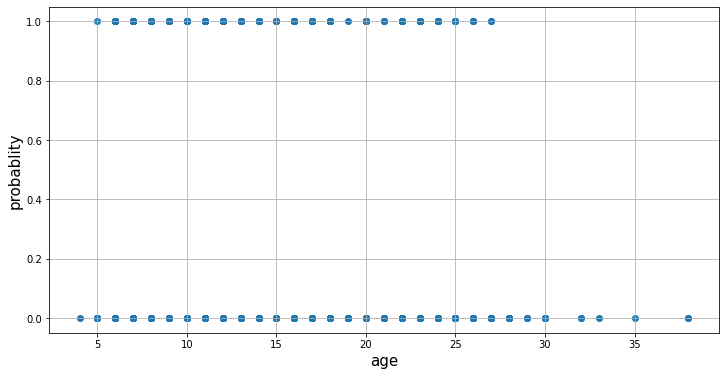

In [1990]:
fig, ax = plt.subplots(figsize=(12,6))

plt.xlabel('age', fontsize='15')
plt.ylabel('probablity', fontsize='15')
ax.scatter(df['AGE'], df['PARASITE_STATUS'])
ax.grid()
plt.show()

For this problem, we will decide to hotencode the "SEX" column

In [1991]:
values = np.array(df['SEX'])
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
print(inverted)

['Male' 'Female' 'Male' ... 'Female' 'Male' 'Male']
[1 0 1 ... 0 1 1]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]
['Male']


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [1992]:
X_i = df['AGE']
y = df['PARASITE_STATUS']

In [1993]:
X_i = X_i.to_numpy()
y = y.to_numpy()

In [1994]:
X_i = X_i.reshape(len(X_i),1)

In [1995]:
X_i = np.column_stack((onehot_encoded, X_i))

In [1996]:
x_train, x_test, y_train, y_test = train_test_split(X_i, y, test_size=0.25)

Since there is an unbalance in the dataset, we will over sample the minority class.

In [1997]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 2103, 1: 2103})
Testing target statistics: Counter({0: 701, 1: 53})


In [1998]:
# w_i = np.array([0.0, 0.0, 0.0, 0.0])
m, n = X_res.shape
w_i = np.zeros(n)
b_i = 0.0
t0, t1 = 5, 50 #hyperparameters

In [1999]:
def learning_rate(t):
  return t0 / (t + t1)

In [2000]:
def normalize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

In [2001]:
def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

In [2002]:
# Method to make predictions
def predict(x, w_0, b_0):
    z = x @ w_0 + b_0
    return sigmoid(z)

In [2003]:
def loss(x, y, w_0, b_0):
  y_hat = predict(x, w_0, b_0)
  error = (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()
  return error

In [2004]:
# Method to train the model - (mini-batch implementation)
def stoc_logistic_regression(X, y, w_0, b_0):

    w, b = w_0.copy(), b_0

    M, n = X.shape

    x = normalize(X)

    eta = 0.01
    epochs = 200
    bs = 100 #batch size

    hist = []

    for epoch in range(epochs):
      print(f"epoch: {epoch}")
      shuffled_indices = np.random.permutation(M)
      X_shuffled = x[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range((M-1)//bs + 1):

        start_i = i*bs
        end_i = start_i + bs

        # print(f"batch {start_i} - {end_i}")
        
        # rand_idx = np.random.randint(M)
        xi = X_shuffled[start_i:end_i]
        yi = y_shuffled[start_i: end_i]

        y_hat = predict(xi, w, b)
        dw = (xi.T @ (y_hat - yi)) / bs # Derivative of loss wrt w
        db = (y_hat - yi).mean() # Derivative of loss wrt b

        eta = learning_rate(epoch*((M-1)//bs + 1) + i)
        # Update w and b
        w = w - eta * dw
        b = b - eta * db

        hist.append(loss(x, y, w, b))
    return w, b, hist

In [2005]:
w, b, hist = stoc_logistic_regression(X_res, y_res, w_i, b_i)

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49
epoch: 50
epoch: 51
epoch: 52
epoch: 53
epoch: 54
epoch: 55
epoch: 56
epoch: 57
epoch: 58
epoch: 59
epoch: 60
epoch: 61
epoch: 62
epoch: 63
epoch: 64
epoch: 65
epoch: 66
epoch: 67
epoch: 68
epoch: 69
epoch: 70
epoch: 71
epoch: 72
epoch: 73
epoch: 74
epoch: 75
epoch: 76
epoch: 77
epoch: 78
epoch: 79
epoch: 80
epoch: 81
epoch: 82
epoch: 83
epoch: 84
epoch: 85
epoch: 86
epoch: 87
epoch: 88
epoch: 89
epoch: 90
epoch: 91
epoch: 92
epoch: 93
epoch: 94
epoch: 95
epoch: 96
epoch: 97
epoch: 98
epoch: 99
epoch: 100

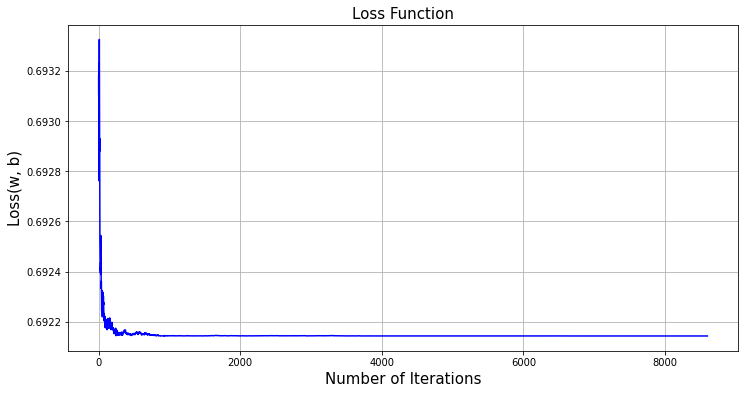

In [2006]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title("Loss Function", fontsize='15')
plt.xlabel('Number of Iterations', fontsize='15')
plt.ylabel(r'Loss(w, b)', fontsize='15')
# plt.figtext(x=.56, y=.6, s="At the final iteration:\n\nw = {}\nb = {}".format(w, b))
ax.plot(hist, 'b')
ax.grid()
plt.show()

In [2007]:
def prediction(X, w_0, b_0):
  
    x = normalize(X)
    
    preds = predict(x, w_0, b_0)
    
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [2008]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [2009]:
p = prediction(x_test, w, b)

In [2010]:
accuracy(y_test, p)

0.5013262599469496

In [2011]:
f1_score(y_test, p)

0.168141592920354

As you can see there is a problem with my implementation, I dont know where I went wrong but maybe it has to something with not enough features or overfitting the model.